### Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt



### Criando dados sintéticos

In [2]:
np.random.seed(1)
X =np.random.uniform(low=0.0, high=10.0, size=(1000,))
#len(X), X.max(), X.min()
slope = 0.25
intercept= -1.25
noise = np.random.normal(loc=0.0, scale=1.0, size=(1000,))
y = slope * X + intercept + noise

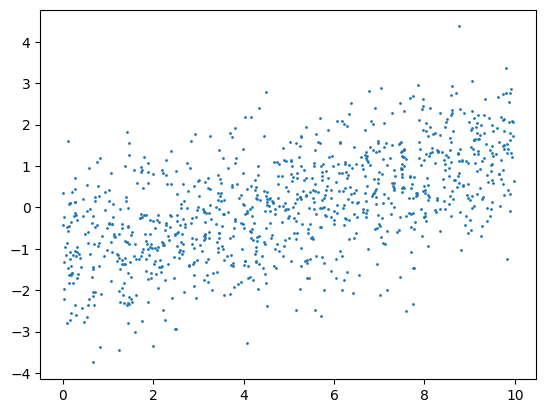

In [3]:
plt.scatter(X,y, s=1);

### Exercício 8 - Regressão Linear com scikit-learn

# 8.1 Instanciando modelo

In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() #regrassão padrao
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

### 8.2 Treinando o modelo

In [5]:
X.reshape(-1, 1).shape

(1000, 1)

In [6]:
lr.fit(X.reshape(-1, 1), y) #.fit significa que estamos iniciando o treinamento
lr.coef_, lr.intercept_
#a = 0.25106337
#b = 0.25106337

#f(x) = a*X+b#


(array([0.25106337]), np.float64(-1.2080021895763124))

8.3 Fazendo previsões

In [7]:
y_pred = lr.predict(X.reshape(-1,1))
y_pred[:10]

array([-0.16101268,  0.60046878, -1.20771504, -0.44895584, -0.8395519 ,
       -0.9761738 , -0.74037102, -0.34042577, -0.21186439,  0.14476928])

### 8.4 Plotando dados e linha de regressão

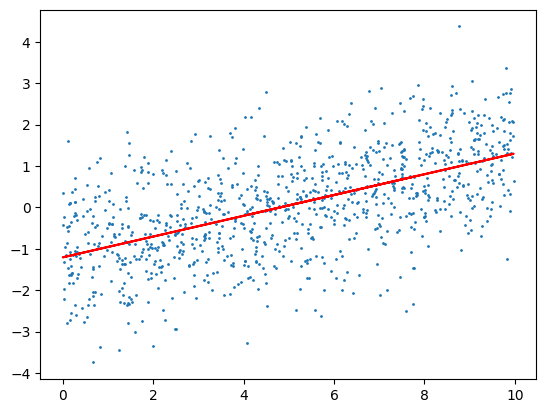

In [8]:
plt.scatter(X,y, s=1) #são as bolinhas em azul
plt.plot(X, y_pred, 'r') #é a reta daspredições

### Avaliação do modelo

### Dividindo dados em treino e teste

treino seria os exercecios e o teste é a prova

In [9]:
import pandas as pd

In [10]:
URL = 'https://raw.githubusercontent.com/TrainingByPackt/Data-Science-Projects-with-Python/master/Data/Chapter_1_cleaned_data.csv'
df = pd.read_csv(URL)


In [11]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'none', 'others', 'university'],
      dtype='object')

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
df['EDUCATION'].values.reshape(-1, 1),
df['default payment next month'].values,
test_size=0.2, random_state=24)
 #test_size=0.2 quero apenas 20% dos dados para teste e o restante para treino

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

np.mean(y_train), np.mean(y_test) #para saber se a taxa de inadiplentes é parecida

(21331, 1)
(5333, 1)
(21331,)
(5333,)


(np.float64(0.223102526838873), np.float64(0.21657603600225014))

### Criando o modelo

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() #inicializamos
lr.fit(X_train, y_train) #treinamos
y_pred = lr.predict(X_test) #fazemos as previsões

### Calculando a acurácia

Acuracia é a taxa de acerto

In [14]:
np.mean(y_pred == y_test) #pred é o que está sendo previsto e test é o gabarito, False é onde ele errou
# sum(y_pred == y_test)/ len(y_pred)

np.float64(0.7834239639977498)

In [15]:
np.unique(y_pred), np.unique(y_test, return_counts=True)

(array([0]), (array([0, 1]), array([4178, 1155])))

### Matriz de confusão

Dá uma ideia mais detalhista de como o modelo está se comportando, elas são a contagem de combinações de resultados organizados em uma matriz

In [16]:
#y_pred[3], y_test[3]
#o modelo disse que 0 que a pessoa não ficou inadiplente, mas a pessoa ficou 1, ele falou que era negativo sendo que era positivo, temos um falso negativo


### Fazendo isso de forma automática

In [17]:
TP = sum((y_pred==1)) & (y_test==1) #quantidade de vezes que y_pred foi 1 e y_test foi 1
TN = sum((y_pred==0)) & (y_test==0)
FP = sum((y_pred==1)) & (y_test==0)
FN = sum((y_pred==0)) & (y_test==1)


In [18]:
#modelo = 1 -> real = 1

In [19]:
# TruePosite = 0  o modelo fala que a pessoa ficou inadiplente mas não está
# TrueNegative = 2  o modelo fala que a pessoa ficou inadiplente e a pessoa realmente ficou
#FalsePositive = 0  o modelo fala que 1 e mas é 0, ou seja a pessoa não é inadiplente.
#FalseNegative = 0  é verdade que a pessoa não vai ficar inadiplente


### Organizando em uma matriz

In [20]:
np.array([[TN, FP], [FN, TP]])

array([[[1, 1, 1, ..., 1, 1, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0]]])

In [21]:
acuracia = (TP + TN) / (TP+TN+FP+FN)  # é o que o modelo acertou

### Exercício 10

### 1. predict_proba

In [22]:
lr.predict_proba(X_test) # o quão confiante o modelo está, não relacionar com probabilidade

array([[0.77460186, 0.22539814],
       [0.77460186, 0.22539814],
       [0.79040462, 0.20959538],
       ...,
       [0.79040462, 0.20959538],
       [0.79040462, 0.20959538],
       [0.79040462, 0.20959538]])

2. Cálculo da soma de "probabilidades"

In [23]:
np.sum(lr.predict_proba(X_test), 1)

array([1., 1., 1., ..., 1., 1., 1.])

### 3. Verificar formato do array

### 4.Verificar formato do array

In [24]:
np.unique(np.sum(lr.predict_proba(X_test),1)) #usando unique para confirmar que todas as linhas do 2. é 1

array([1.])

### 5. Verificar as probalidades positivas

pegando todas as colunas e a coluna 1, que fala sobre a confiança que o modelo tem das pesssoas serem inadiplentes

In [27]:
pos_proba = lr.predict_proba(X_test)[:, 1]
pos_proba

array([0.22539814, 0.22539814, 0.20959538, ..., 0.20959538, 0.20959538,
       0.20959538])

### 6. Calcular histograma

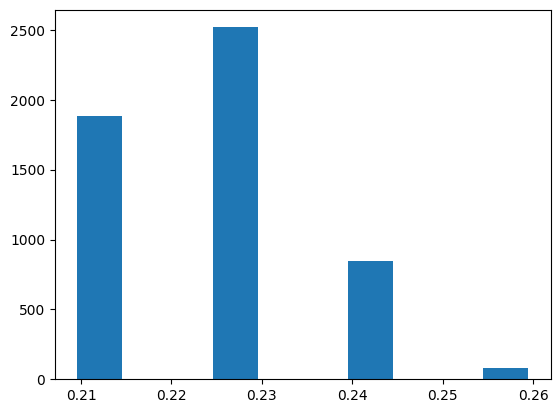

In [33]:
plt.hist(pos_proba);


### 7. plotar probabilidades

In [ ]:
threshold = 0.5 #se a gente mudar esse threshold se muda a confiança do modelo

### mostra a confiança da distribuição do modelo

*   mostrando que é bem baixo (0.25)



Text(0, 0.5, 'Number of samples')

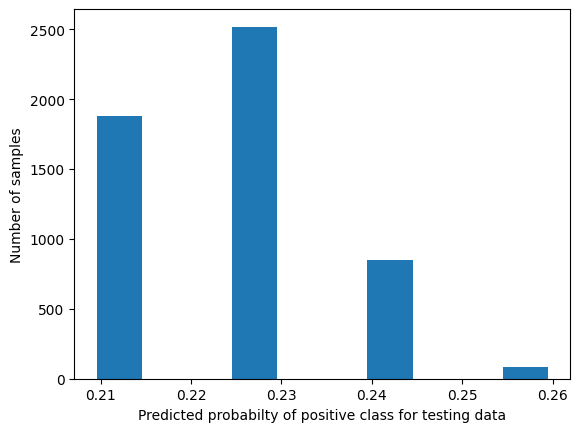

In [32]:
plt.hist(pos_proba);
plt.xlabel('Predicted probabilty of positive class for testing data')
plt.ylabel('Number of samples')

### 8. Isolar "probalidades" (pos/neg)

In [44]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

### 9. Plotar histograma empilhado

In [47]:
lr.predict_proba(X_test)

array([[0.77460186, 0.22539814],
       [0.77460186, 0.22539814],
       [0.79040462, 0.20959538],
       ...,
       [0.79040462, 0.20959538],
       [0.79040462, 0.20959538],
       [0.79040462, 0.20959538]])

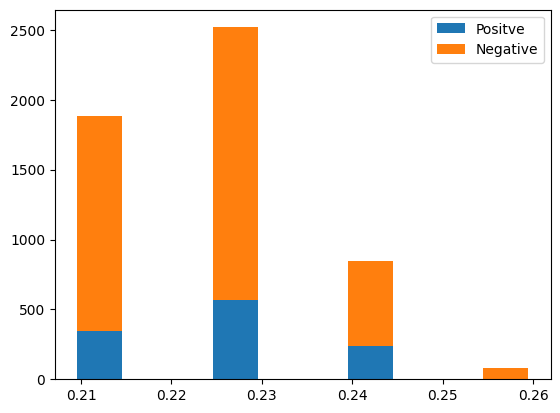

In [46]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype ='barstacked');
plt.legend(['Positve', 'Negative']);

### Curva receiver operating characterictic (ROC)

Text(0, 0.5, 'TPR')

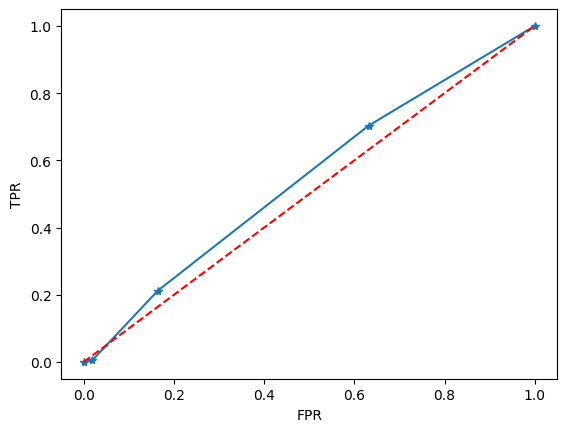

In [56]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)
plt.plot(fpr, tpr, '*-')
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')

Text(0, 0.5, 'TPR')

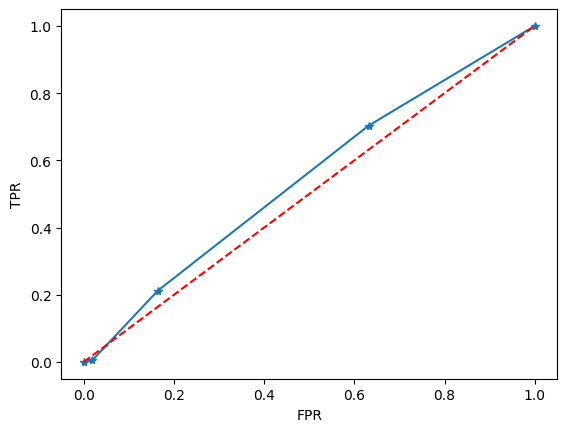

In [ ]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)
plt.plot(fpr, tpr, '*-')
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [58]:
print(thresholds)
print(fpr)
print(tpr)

[       inf 0.25947283 0.24202753 0.22539814 0.20959538]
[0.         0.01842987 0.16419339 0.63140258 1.        ]
[0.         0.004329   0.21212121 0.7030303  1.        ]


In [87]:
pos_preds = lr.predict_proba(X_test)[:, 1]
pos_preds[pos_preds>0.22539814] = 1
pos_preds[pos_preds<=0.22539814] = 0

pos_preds[:10]


array([0., 0., 0., 0., 0., 1., 0., 1., 0., 0.])

In [88]:
y_pred = pos_preds

TP = sum((y_pred==1)) & (y_test==1)
TN = sum((y_pred==0)) & (y_test==0)
FP = sum((y_pred==1)) & (y_test==0)
FN = sum((y_pred==0)) & (y_test==1)

TP, TN, FP, FN

(array([0, 0, 0, ..., 0, 0, 1]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([1, 1, 1, ..., 1, 1, 0]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [89]:
acuracia = (TP+TN)/ (TP+TN+FP+FN)
acuracia

array([0., 0., 0., ..., 0., 0., 1.])

In [91]:
precision = TP / (TP + FP)
precision

array([0., 0., 0., ..., 0., 0., 1.])